<h2>Importing Module</h2>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import random


<h2>Load Data</h2>

In [4]:
df=pd.read_csv("Student_Performance.csv")
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


<h2>Check the null values</h2>

In [7]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [8]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [9]:
df.shape

(10000, 6)

<h2>Check the outliears</h2>

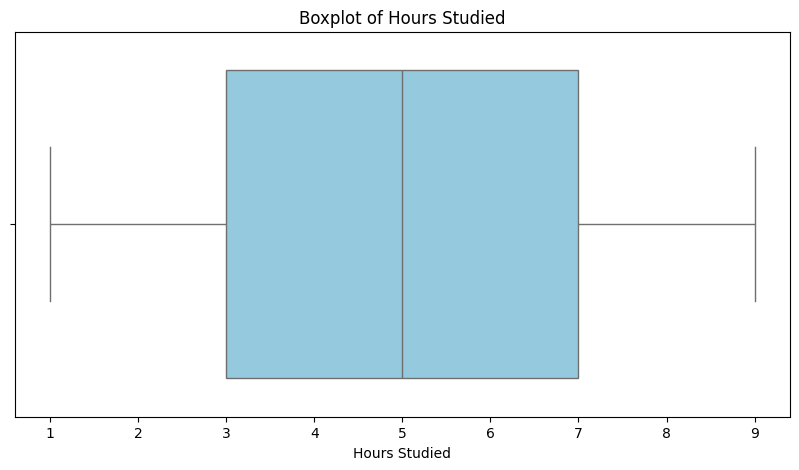

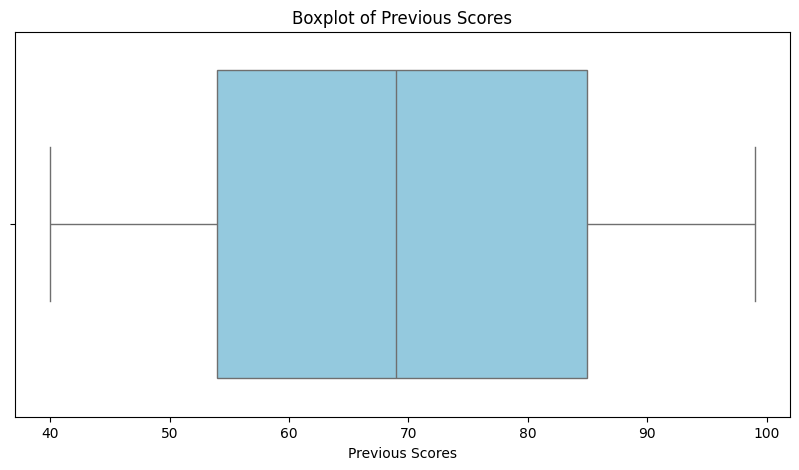

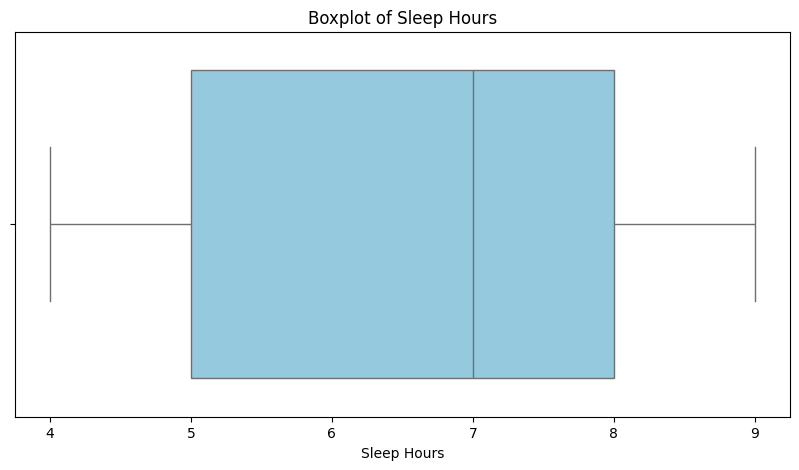

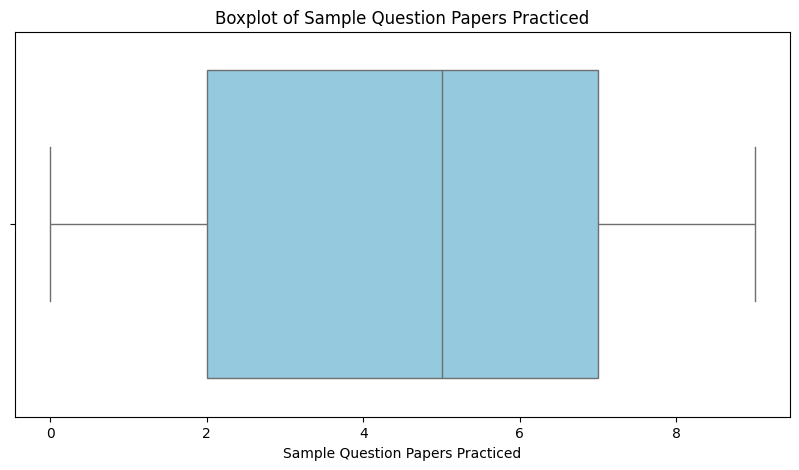

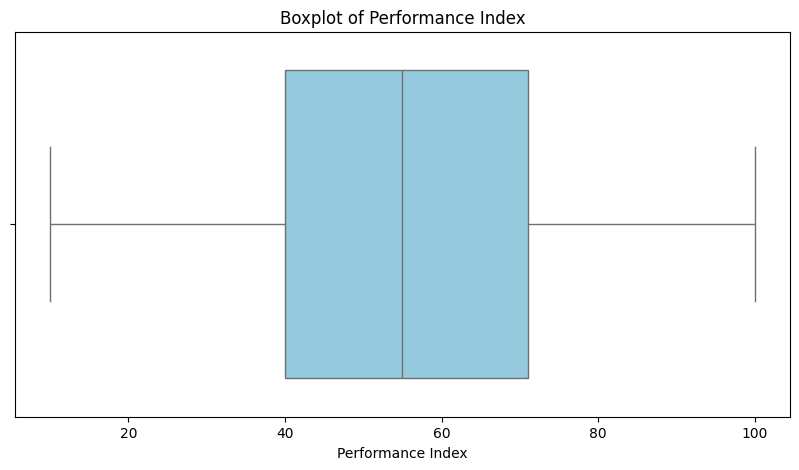

In [10]:
for col in df.columns:
    if df[col].dtype != 'object':
        fig, ax = plt.subplots(figsize=(10, 5))
        ax.set_title(f'Boxplot of {col}')
        bp = sns.boxplot(data = df, x = col,color='skyblue')
        plt.show()


<Axes: xlabel='Performance Index', ylabel='Count'>

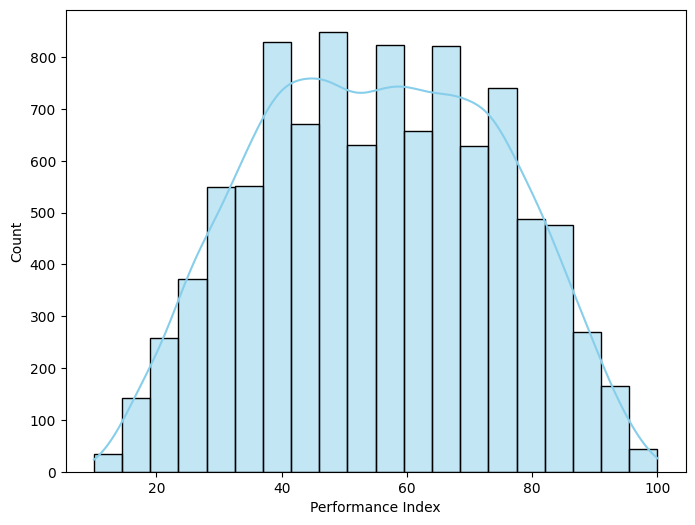

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Performance Index'], bins=20, kde=True, color='skyblue')

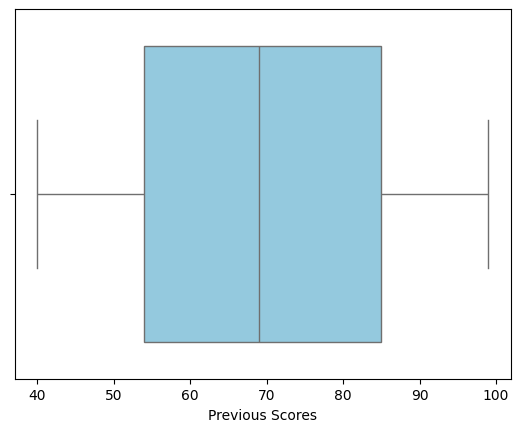

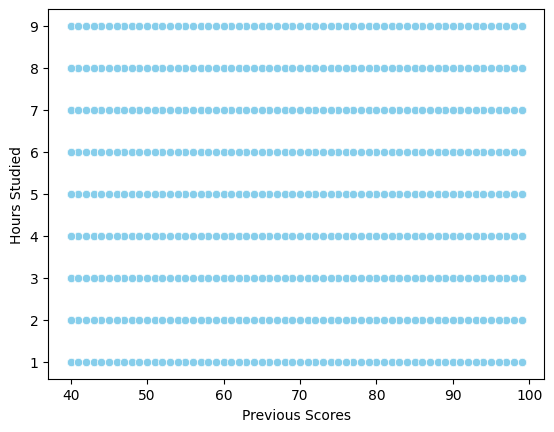

In [12]:
sns.set_palette('Set3')
bp = sns.boxplot(data = df, x = "Previous Scores",color='skyblue')
plt.show()
sp = sns.scatterplot(data = df, x = "Previous Scores", y=df["Hours Studied"],color='skyblue')
plt.show()

<h2>Scale & Normlization</h2>

C:\Users\User\AppData\Local\Temp\ipykernel_21520\1094810701.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(original_df, ax=ax[0],color='skyblue')
C:\Users\User\AppData\Local\Temp\ipykernel_21520\1094810701.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scaled_df, ax=ax[1],color='skyb

Text(0.5, 1.0, 'Scaled out_df')

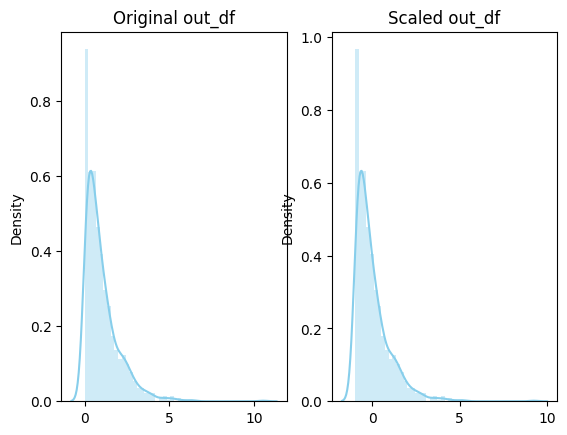

In [13]:
from sklearn.preprocessing import StandardScaler

# generate 1000 out_df points randomly drawn from an exponential distribution
original_df = np.random.exponential(size=1000).reshape(-1, 1)

scaler = StandardScaler()
# scale the out_df using z-score scaling
scaled_df = scaler.fit_transform(original_df)


fig, ax=plt.subplots(1,2)
sns.distplot(original_df, ax=ax[0],color='skyblue')
ax[0].set_title("Original out_df")
sns.distplot(scaled_df, ax=ax[1],color='skyblue')
ax[1].set_title("Scaled out_df")

In [14]:
df=df.drop_duplicates()

In [15]:
df.shape

(9873, 6)

In [16]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [17]:
from sklearn import preprocessing
LE= preprocessing.LabelEncoder()
df["Extracurricular Activities"] = LE.fit_transform(df["Extracurricular Activities"])
df

C:\Users\User\AppData\Local\Temp\ipykernel_21520\2046823854.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Extracurricular Activities"] = LE.fit_transform(df["Extracurricular Activities"])


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [18]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities            int32
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

<h2>Linear Regration</h2>

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.pipeline import make_pipeline

In [20]:

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


In [21]:
regressor = LinearRegression()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)

In [23]:
regressor.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = regressor.predict(X_test)

In [25]:
y_train.shape

(7898,)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

linearmodel=LinearRegression()
linearmodel.fit(X_train,y_train)
y_pred_linear=linearmodel.predict(X_test)
mse_lin=mean_squared_error(y_test,y_pred_linear)
r2_lin=r2_score(y_test,y_pred_linear)
print(f"Mean squared error: {mse_lin}")
print(f"R2_Score: {r2_lin}")


Mean squared error: 4.490041091497723
R2_Score: 0.9878120360079914


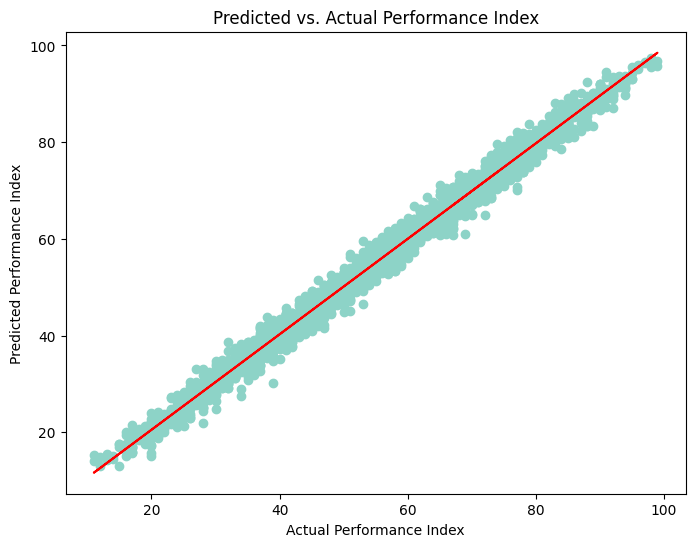

In [27]:
slope, intercept = np.polyfit(y_test, y_pred, 1)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.title('Predicted vs. Actual Performance Index')
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.plot(y_test, slope*y_test + intercept, color='red')

plt.show()

<h2>Polynomial Regression</h2>

In [28]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
degrees=[2,3,4]

for degree in degrees:
    model=make_pipeline(PolynomialFeatures(degree),LinearRegression())
    model.fit(X_train,y_train)

    y_pred_poly=model.predict(X_test)
    r2_poly=r2_score(y_test,y_pred_poly)
    mse_poly=mean_squared_error(y_test,y_pred_poly)

    print(f'Polynomial Regression (Degree {degree}): ')
    print(f'R2_score: ',r2_poly)
    print(f'MSE: ',mse_poly)


Polynomial Regression (Degree 2): 
R2_score:  0.9877736710985001
MSE:  4.504174708909146


Polynomial Regression (Degree 3): 
R2_score:  0.987715642568796
MSE:  4.5255523961932225
Polynomial Regression (Degree 4): 
R2_score:  0.9876162085043451
MSE:  4.562183866024608


<h2>Random Forest Classifier</h2>

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rf_classifier = RandomForestClassifier()
clf=rf_classifier.fit(X_train, y_train)

In [32]:
y_pred_rf = clf.predict(X_test)

In [33]:
from sklearn.metrics import mean_squared_error, r2_score

mse_linear = mean_squared_error(y_test, y_pred_rf)
r2_linear = r2_score(y_test, y_pred_rf)
print("Random Forest Classifier:\nMean Squared Error:", mse_linear, "\nR2_score:", r2_linear)

Random Forest Classifier:
Mean Squared Error: 9.393924050632911 
R2_score: 0.9745007215436001


<h2>Testing first column for each model</h2>

In [34]:
# Linear Regression

pred = np.array([7 , 99 , 1 , 9 , 1]).reshape(1, -1)
LR_predictions = regressor.predict(pred)
print("Predictions:", LR_predictions)

# Polynomial Regression

PR_predictions = model.predict(pred)
print("\nPredictions:", PR_predictions)

# Random Forest Classifier

RM_predictions = clf.predict(pred)
print("\nPredictions:", RM_predictions)

Predictions: [91.84918259]

Predictions: [91.98764722]

Predictions: [91.]
